














































## A workshop to develop an options valuation model.

#### The options valuation model should allow me to present historical data regarding an equity and its derivatives (puts and calls) and receive all the information I would need to determine what contract best serves my thesis.

In [1]:
#Pseudocode

#def function_to_determine_tool(the thesis, the toolkit, the bank account):
#The thesis:
#It has a specific defined time period.
#The thesis is instantiated on a specific defined asset. 
#The asset exists on a continuum of possible prices.
#The thesis has an entry and exit strategy.
#The toolkit:
#Is every singular and combinatory tool that can be used on an asset.
#Every single tool has a specific defined time period that must align with the thesis.
#The bank account:
#Helps you understand your capacities.
#Helps you understand your risk tolerance.

#Many of the aspects of all three are correlated and intertwined.

#This is something we must consider as we work.


## <font color = 'pink'> DATA COLLECTION AND EXPLORATION

In [2]:
pip install QuantLib

  Obtaining dependency information for QuantLib from https://files.pythonhosted.org/packages/e0/5a/25ff85724c6736843de961dd715c17e305062d7c5cdfa22d3863239bdeb9/QuantLib-1.37-cp38-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB 1.4 MB/s eta 0:00:10
   - -------------------------------------- 0.5/12.9 MB 8.4 MB/s eta 0:00:02
   --------- ------------------------------ 2.9/12.9 MB 23.2 MB/s eta 0:00:01
   ------------------ --------------------- 6.0/12.9 MB 35.3 MB/s eta 0:00:01
   ---------------------------- ----------- 9.1/12.9 MB 41.5 MB/s eta 0:00:01
   ------------------------------------ --- 11.8/12.9 MB 59.5 MB/s eta 0:00:01
   ---------------------------------------- 12.9/12.9 MB 50.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


#### <font color = 'pink'> Ultimate Goal: Using just a thesis, a fund size, and an api key, I want the algorithim to select the best strategy of those listed on my CME sheet.

###### <font color = 'pink'> The best strat is determined by median and mean return over monte carlo simulation, best sharpe ratio, and best sterling ratio for now.

In [ ]:
#We will use alpha vantage for basic data collection.
#We will focus on AAPL, because it is so liquid and the data is so available.


api_key = '8CTF0D0WVXWCLBVF'

import requests
import pandas as pd
import numpy as np
import QuantLib as ql
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def get_historical_options_data(ticker, start_date, end_date):
    """
    Placeholder function for historical options data.
    If your data source is Alpha Vantage's HISTORICAL_OPTIONS or something else,
    you can adapt it accordingly. Returns a DataFrame with many columns, including:
      ['contractID', 'expiration', 'strike', 'type', 'premium', 'volume', 'data_date']
    """
    # This is a stub to demonstrate approach:
    all_dates = pd.date_range(start_date, end_date, freq='D')
    frames = []
    for single_date in all_dates:
        date_str = single_date.strftime('%Y-%m-%d')
        url = (f"https://www.alphavantage.co/query?function=HISTORICAL_OPTIONS"
               f"&symbol={ticker}&date={date_str}&apikey={'8CTF0D0WVXWCLBVF'}")
        r = requests.get(url)
        data = r.json()
        if 'data' in data:
            df_daily = pd.DataFrame(data['data'])
            df_daily['data_date'] = date_str
            frames.append(df_daily)
    if frames:
        options_df = pd.concat(frames, ignore_index=True)
    else:
        options_df = pd.DataFrame()
    return options_df

In [2]:
#Just got the idea to use stumpy to see similar historical options flow...
df = get_historical_underlying_data('AAPL', '2024-01-01', '2024-01-31')
print(df)

               Open      High       Low   Close  Adjusted Close    Volume
2024-01-02  187.150  188.4400  183.8850  185.64      184.532826  82488674
2024-01-03  184.220  185.8800  183.4300  184.25      183.151116  58414460
2024-01-04  182.150  183.0872  180.8800  181.91      180.825072  71983570
2024-01-05  181.990  182.7600  180.1700  181.18      180.099426  62196924
2024-01-08  182.085  185.6000  181.5000  185.56      184.453303  59144470
2024-01-09  183.920  185.1500  182.7300  185.14      184.035808  42841809
2024-01-10  184.350  186.4000  183.9200  186.19      185.079546  46792908
2024-01-11  186.540  187.0500  183.6200  185.59      184.483124  49128408
2024-01-12  186.060  186.7400  185.1900  185.92      184.811156  40477782
2024-01-16  182.160  184.2600  180.9340  183.63      182.534814  65603041
2024-01-17  181.270  182.9300  180.3000  182.68      181.590480  47317433
2024-01-18  186.090  189.1400  185.8300  188.63      187.504993  78005754
2024-01-19  189.330  191.9500  188.820

In [57]:
df = get_historical_options_data('AAPL', api_key, '2024-01-01', '2024-01-31')
print(df)

                contractID symbol  expiration  strike  type    last    mark  \
0      AAPL240105C00050000   AAPL  2024-01-05   50.00  call  144.80  135.32   
1      AAPL240105P00050000   AAPL  2024-01-05   50.00   put    0.01    0.01   
2      AAPL240105C00060000   AAPL  2024-01-05   60.00  call    0.00  125.33   
3      AAPL240105P00060000   AAPL  2024-01-05   60.00   put    0.00    0.01   
4      AAPL240105C00065000   AAPL  2024-01-05   65.00  call    0.00  120.33   
...                    ...    ...         ...     ...   ...     ...     ...   
43961  AAPL260618P00290000   AAPL  2026-06-18  290.00   put    0.00  105.25   
43962  AAPL260618C00300000   AAPL  2026-06-18  300.00  call    3.02    3.00   
43963  AAPL260618P00300000   AAPL  2026-06-18  300.00   put  110.00  115.50   
43964  AAPL260618C00310000   AAPL  2026-06-18  310.00  call    2.41    2.50   
43965  AAPL260618P00310000   AAPL  2026-06-18  310.00   put  125.50  125.50   

          bid bid_size     ask ask_size volume open

In [8]:
df1 = df[df['strike'] == 215]
print(df1.head())

Empty DataFrame
Columns: [data_date, contractID, symbol, expiration, strike, type, last, mark, bid, bid_size, ask, ask_size, volume, open_interest, date, implied_volatility, delta, gamma, theta, vega, rho]
Index: []

[0 rows x 21 columns]


In [58]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [109]:
from data_fetch import volume_filter

In [60]:
filtered_df = volume_filter(df)
print(filtered_df.head(15))

             contractID symbol  expiration  strike  type   last   mark    bid  \
43  AAPL240105P00160000   AAPL  2024-01-05  160.00   put   0.02   0.01   0.00   
45  AAPL240105P00162500   AAPL  2024-01-05  162.50   put   0.02   0.01   0.00   
47  AAPL240105P00165000   AAPL  2024-01-05  165.00   put   0.02   0.02   0.01   
49  AAPL240105P00167500   AAPL  2024-01-05  167.50   put   0.02   0.03   0.02   
50  AAPL240105C00170000   AAPL  2024-01-05  170.00  call  15.71  15.75  15.20   
51  AAPL240105P00170000   AAPL  2024-01-05  170.00   put   0.03   0.03   0.02   
52  AAPL240105C00172500   AAPL  2024-01-05  172.50  call  12.29  12.95  12.35   
53  AAPL240105P00172500   AAPL  2024-01-05  172.50   put   0.03   0.03   0.01   
54  AAPL240105C00175000   AAPL  2024-01-05  175.00  call  10.80  10.62  10.40   
55  AAPL240105P00175000   AAPL  2024-01-05  175.00   put   0.05   0.06   0.05   
56  AAPL240105C00177500   AAPL  2024-01-05  177.50  call   7.50   8.28   8.00   
57  AAPL240105P00177500   AA

In [68]:
filtered_df.columns

Index(['contractID', 'symbol', 'expiration', 'strike', 'type', 'last', 'mark',
       'bid', 'bid_size', 'ask', 'ask_size', 'volume', 'open_interest', 'date',
       'implied_volatility', 'delta', 'gamma', 'theta', 'vega', 'rho',
       'volume_summed'],
      dtype='object')

In [63]:
calls = (filtered_df['type'] == 'call').sum()
puts = (filtered_df['type'] == 'put').sum()

print(f"The number of calls are {calls} and the number of puts are {puts}")

The number of calls are 10202 and the number of puts are 8659


In [67]:
# Sum of puts
sum_of_put_volume = filtered_df[filtered_df['type'] == 'put']['volume'].sum()

# Sum of calls
sum_of_call_volume = filtered_df[filtered_df['type'] == 'call']['volume'].sum()

put_call_ratio = sum_of_put_volume / sum_of_call_volume

print(f"The sum of put volume is {sum_of_put_volume} and the sum of call volume is {sum_of_call_volume}, additionally, the put call ratio is {put_call_ratio}")


The sum of put volume is 7936696 and the sum of call volume is 11234814, additionally, the put call ratio is 0.7064376855727207


In [73]:
print(filtered_df.dtypes)


contractID            object
symbol                object
expiration            object
strike                object
type                  object
last                  object
mark                  object
bid                   object
bid_size              object
ask                   object
ask_size              object
volume                 int64
open_interest         object
date                  object
implied_volatility    object
delta                 object
gamma                 object
theta                 object
vega                  object
rho                   object
volume_summed          int64
dtype: object


In [77]:
filtered_df['strike'] = pd.to_numeric(filtered_df['strike'], errors = 'coerce')
filtered_df['expiration'] = pd.to_datetime(filtered_df['expiration'])
filtered_df['last'] = pd.to_numeric(filtered_df['last'], errors = 'coerce')
filtered_df['bid'] = pd.to_numeric(filtered_df['bid'], errors = 'coerce')
filtered_df['ask'] = pd.to_numeric(filtered_df['ask'], errors = 'coerce')
filtered_df['volume'] = pd.to_numeric(filtered_df['volume'], errors = 'coerce')
filtered_df['open_interest'] = pd.to_numeric(filtered_df['open_interest'], errors = 'coerce')
filtered_df['ask_size'] = pd.to_numeric(filtered_df['ask_size'], errors = 'coerce')
filtered_df['bid_size'] = pd.to_numeric(filtered_df['bid_size'], errors = 'coerce')
filtered_df['mark'] = pd.to_numeric(filtered_df['mark'], errors = 'coerce')
filtered_df['date'] = pd.to_datetime(filtered_df['date'])
filtered_df['implied_volatility'] = pd.to_numeric(filtered_df['implied_volatility'], errors = 'coerce')
filtered_df['delta'] = pd.to_numeric(filtered_df['delta'], errors = 'coerce')
filtered_df['gamma'] = pd.to_numeric(filtered_df['gamma'], errors = 'coerce')
filtered_df['theta'] = pd.to_numeric(filtered_df['theta'], errors = 'coerce')
filtered_df['vega'] = pd.to_numeric(filtered_df['vega'], errors = 'coerce')
filtered_df['rho'] = pd.to_numeric(filtered_df['rho'], errors = 'coerce')



C:\Users\david\AppData\Local\Temp\ipykernel_103556\633977043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['strike'] = pd.to_numeric(filtered_df['strike'], errors = 'coerce')
C:\Users\david\AppData\Local\Temp\ipykernel_103556\633977043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['expiration'] = pd.to_datetime(filtered_df['expiration'])
C:\Users\david\AppData\Local\Temp\ipykernel_103556\633977043.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

## Vanna and Charm: Second Order Derivatives

##### I will add these as these second order derivatives can help understand the market and value of the options.

In [116]:
from sub_derivs import sub_derivs

In [78]:
# vanna = vega * (delta/iv)
# charm = (-theta*delta)/Spot price

filtered_df['vanna'] = filtered_df['vega']*(filtered_df['delta']/filtered_df['implied_volatility'])
filtered_df['charm'] = -1*(filtered_df['theta']*filtered_df['delta'])/filtered_df['last']

C:\Users\david\AppData\Local\Temp\ipykernel_103556\2919229364.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['vanna'] = filtered_df['vega']*(filtered_df['delta']/filtered_df['implied_volatility'])
C:\Users\david\AppData\Local\Temp\ipykernel_103556\2919229364.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['charm'] = -1*(filtered_df['theta']*filtered_df['delta'])/filtered_df['last']


In [79]:
filtered_df.head()

,contractID,symbol,expiration,strike,type,last,mark,bid,bid_size,ask,...,date,implied_volatility,delta,gamma,theta,vega,rho,volume_summed,vanna,charm
43,AAPL240105P00160000,AAPL,2024-01-05,160.0,put,0.02,0.01,0.00,0,0.02,...,2024-01-02,0.60854,-0.00317,0.00094,-0.05958,0.00162,-0.00005,844,-0.000008,-0.009443
45,AAPL240105P00162500,AAPL,2024-01-05,162.5,put,0.02,0.01,0.00,0,0.02,...,2024-01-02,0.55092,-0.00347,0.00113,-0.05855,0.00176,-0.00005,2445,-0.000011,-0.010158
47,AAPL240105P00165000,AAPL,2024-01-05,165.0,put,0.02,0.02,0.01,1,0.03,...,2024-01-02,0.53339,-0.00674,0.00210,-0.10229,0.00317,-0.00010,5873,-0.000040,-0.034472
49,AAPL240105P00167500,AAPL,2024-01-05,167.5,put,0.02,0.03,0.02,20,0.03,...,2024-01-02,0.49741,-0.01038,0.00329,-0.13913,0.00463,-0.00016,10964,-0.000097,-0.072208
50,AAPL240105C00170000,AAPL,2024-01-05,170.0,call,15.71,15.75,15.20,1,16.30,...,2024-01-02,0.44467,0.98659,0.00459,-0.24575,0.00579,0.01376,994,0.012846,0.015433


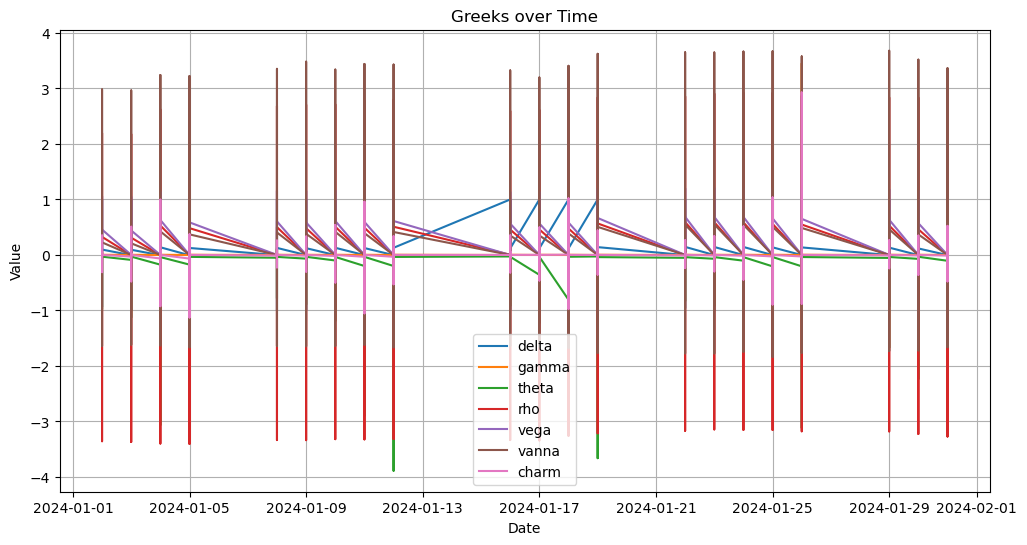

In [85]:
import matplotlib.pyplot as plt

greeks = filtered_df[['delta', 'gamma', 'theta', 'rho', 'vega', 'vanna', 'charm']]

plt.figure(figsize=(12, 6))

for greek in greeks.columns:
    plt.plot(filtered_df['date'], filtered_df[greek], label=greek)


plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Greeks over Time')
plt.legend()
plt.grid(True)

plt.show()


In [117]:
from data_fetch import create_expiration_dataframes

In [118]:
expiration_dfs, expiration_keys = create_expiration_dataframes(filtered_df)


In [100]:
print(expiration_keys)

dict_keys(['2024-01-05', '2024-01-12', '2024-01-19', '2024-01-26', '2024-02-02', '2024-02-09', '2024-02-16', '2024-03-15', '2024-04-19', '2024-05-17', '2024-06-21', '2024-07-19', '2024-09-20', '2024-12-20', '2025-01-17', '2025-06-20', '2025-09-19', '2025-12-19', '2026-01-16', '2024-08-16', '2024-02-23', '2026-06-18', '2024-03-01', '2024-03-08', '2025-03-21'])


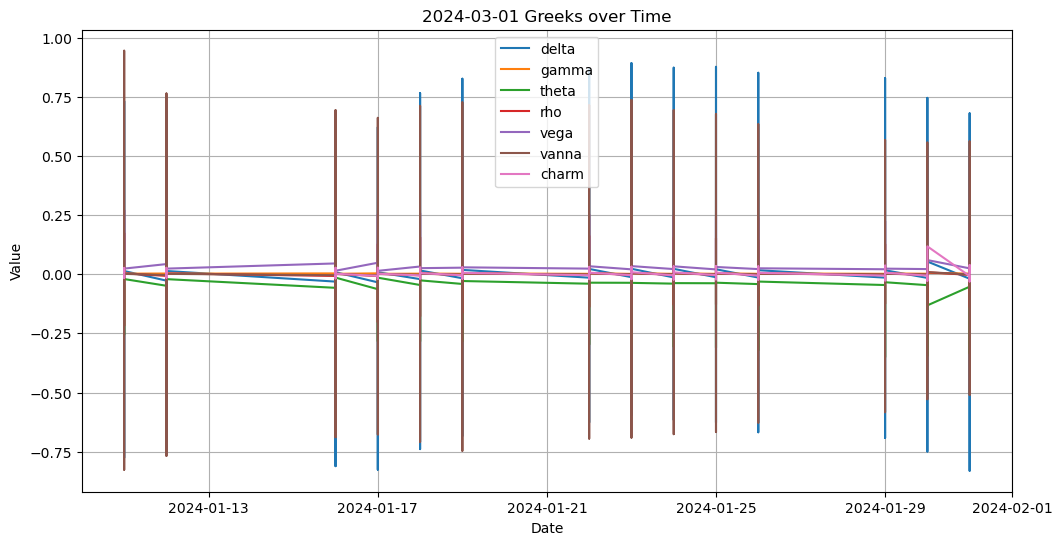

In [102]:
greeks = expiration_dfs['2024-03-01'][['delta', 'gamma', 'theta', 'rho', 'vega', 'vanna', 'charm']]

plt.figure(figsize=(12, 6))

for greek in greeks.columns:
    plt.plot(expiration_dfs['2024-03-01']['date'], expiration_dfs['2024-03-01'][greek], label=greek)


plt.xlabel('Date')
plt.ylabel('Value')
plt.title('2024-03-01 Greeks over Time')
plt.legend()
plt.grid(True)

plt.show()

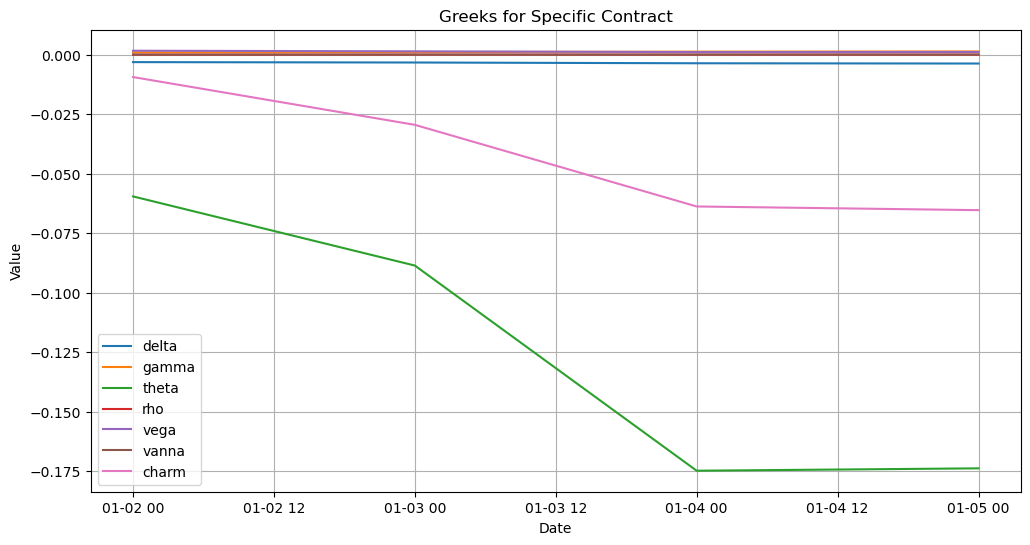

In [106]:
import matplotlib.pyplot as plt

# Filter the DataFrame correctly
greeks = filtered_df[filtered_df['contractID'] == 'AAPL240105P00160000'][['delta', 'gamma', 'theta', 'rho', 'vega', 'vanna', 'charm']]

# Initialize figure before plotting
plt.figure(figsize=(12, 6))

# Loop through each Greek and plot it
for greek in greeks.columns:
    plt.plot(filtered_df[filtered_df['contractID'] == 'AAPL240105P00160000']['date'], greeks[greek], label=greek)  # Fix incorrect reference

# Formatting
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Greeks for Specific Contract')
plt.legend()
plt.grid(True)

# Show plot after all Greeks are plotted
plt.show()


## <font color ='pink'> Now let us create a large script to rank the strategies.

#### First thing first... the thesis.

##### This script is unconcerned with the derivation of a thesis.

##### Still we must understand how the thesis works, and its parts, so that we can model it adequately.

##### So what are the parts of a trade thesis?

##### The exact asset. Apple, Front Month Henry Hub Natural Gas, M2/M1 WTI

##### Intended Direction. For price/vol etc. There are three directions. Up, down, and sideways.

##### Core Rationale. OpenAI API?

##### Defined Time Horizon.

##### Catalysts

##### Fundamental, technical, or quant analysis.

##### Backtesting score

##### Extremely precise entry standards (based on price data, technical or other indicators etc.)

##### Extremely precise exit standards (profit target, time-based exit, invalidation of thesis)

##### Position Sizing and Risk Management: What is the bankroll, what is the VaR, max drawdown constraints.

##### Pain Threshold.

##### Liquidity considerations.

##### Contingency plans, for our purposes, these will be exit strategies.

##### We want a 

In [ ]:
#How do we quantify these...

#Exact asset: AAPL
#Asset characteristic: Price
#Intended direction: Up
#Defined Time Horizon: Exactly 30 days.
#Entry Strategy: When price breaks above 30-day MA.
#Exit strategy: Whichever comes first -> 
#     Gain in excess of 7.5%, drawdown in excess of 5%, or 30 days.

#Catalyst: N/A
#AUM: $25,000
#Risk Tolerance: 5% of AUM
#Liquidity Considerations: High, but examined per strategy.

#At the end of the day this is simply an EV calculation of all the different strategies, for all the different conceivable time periods
#Additionally what we really want is a visualization of each strategy graphed across different time frames

def choose_a_strategy(api_key, ticker, intended_direction -> 0 or 1, begin_date, end_date, entry_strategy, exit_strategy, catalyst, AUM, risk_tolerance, liquidity):
    
    df = get_historical_options_data(ticker, api_key, begin_date, end_date)
    expiration_dfs = create_expiration_dataframes(df)
    
    


In [3]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [5]:
import yfinance as yf

In [6]:
aapl = yf.Ticker('aapl')

In [7]:
aapl.options

('2025-02-21',
 '2025-02-28',
 '2025-03-07',
 '2025-03-14',
 '2025-03-21',
 '2025-03-28',
 '2025-04-17',
 '2025-05-16',
 '2025-06-20',
 '2025-07-18',
 '2025-08-15',
 '2025-09-19',
 '2025-10-17',
 '2025-12-19',
 '2026-01-16',
 '2026-03-20',
 '2026-06-18',
 '2026-12-18',
 '2027-01-15',
 '2027-06-17')

In [10]:
opt = aapl.option_chain()
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL250221C00100000,2025-02-12 18:40:34+00:00,100.0,135.70,144.00,145.40,0.0,0.0,5,13,2.757816,True,REGULAR,USD
1,AAPL250221C00105000,2024-12-27 16:14:26+00:00,105.0,149.85,130.65,131.65,0.0,0.0,1,4,0.000010,True,REGULAR,USD
2,AAPL250221C00110000,2025-02-11 19:07:05+00:00,110.0,123.80,134.00,135.40,0.0,0.0,1,1,2.484379,True,REGULAR,USD
3,AAPL250221C00115000,2025-01-27 16:32:05+00:00,115.0,113.65,128.95,130.40,0.0,0.0,6,1,2.281254,True,REGULAR,USD
4,AAPL250221C00120000,2025-01-28 18:41:22+00:00,120.0,118.95,124.00,125.40,0.0,0.0,1,0,2.226567,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,AAPL250221C00360000,2025-01-30 17:52:42+00:00,360.0,0.01,0.00,0.01,0.0,0.0,1,440,0.921876,False,REGULAR,USD
64,AAPL250221C00365000,2025-01-29 14:30:06+00:00,365.0,0.02,0.00,0.01,0.0,0.0,1,2021,0.937501,False,REGULAR,USD
65,AAPL250221C00370000,2025-01-28 19:48:15+00:00,370.0,0.01,0.00,0.01,0.0,0.0,39,572,0.968750,False,REGULAR,USD
66,AAPL250221C00375000,2025-01-28 19:27:14+00:00,375.0,0.01,0.00,0.01,0.0,0.0,24,1480,1.000005,False,REGULAR,USD
